In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report, f1_score, precision_score, recall_score

In [2]:
df_A = pd.read_csv('application_record.csv')

In [3]:
df_A.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
print(f'{df_A.shape[0]} rows')

438557 rows


In [5]:
print(f'{df_A.shape[1]} columns')

18 columns


In [6]:
print(f'{df_A.dtypes} data types')

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object data types


In [7]:
df_C=pd.read_csv('credit_record.csv')

In [8]:
df_C.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [9]:
print(f'{df_C.shape[0]} rows')

1048575 rows


In [10]:
print(f'{df_C.shape[1]} columns')

3 columns


In [11]:
print(f'{df_C.dtypes} data types')

ID                 int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object data types


In [12]:
df = pd.merge(df_A, df_C, on='ID' , how='inner')

In [13]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C


In [14]:
print(f'{df.shape[1]} columns and {df.shape[0]} rows')

20 columns and 777715 rows


In [15]:
df.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
dtype: int64

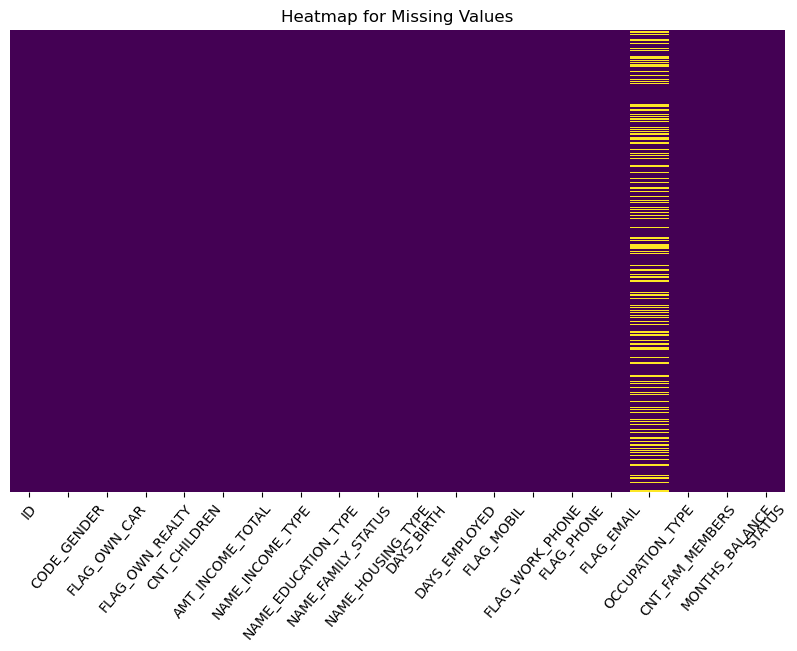

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cbar=False , yticklabels=False, cmap='viridis')
plt.title('Heatmap for Missing Values')
plt.xticks(rotation=50)
plt.show()

In [17]:
df['OCCUPATION_TYPE'].isna().sum() / df.shape[0] * 100

30.86580559716606

In [18]:
df.drop('OCCUPATION_TYPE', axis=1, inplace=True)

In [19]:
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'STATUS'],
      dtype='object')

In [20]:
df.nunique()

ID                     36457
CODE_GENDER                2
FLAG_OWN_CAR               2
FLAG_OWN_REALTY            2
CNT_CHILDREN               9
AMT_INCOME_TOTAL         265
NAME_INCOME_TYPE           5
NAME_EDUCATION_TYPE        5
NAME_FAMILY_STATUS         5
NAME_HOUSING_TYPE          6
DAYS_BIRTH              7183
DAYS_EMPLOYED           3640
FLAG_MOBIL                 1
FLAG_WORK_PHONE            2
FLAG_PHONE                 2
FLAG_EMAIL                 2
CNT_FAM_MEMBERS           10
MONTHS_BALANCE            61
STATUS                     8
dtype: int64

In [21]:
df.duplicated().sum()

0

In [22]:
df[df['ID'].duplicated()].head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-4,C
5,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-5,C
6,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-6,C
7,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-7,C
8,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-8,C
9,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-9,C
10,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-10,C


In [23]:
df[df['ID'].duplicated()].tail(20)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
777694,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,2.0,-3,0
777695,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,2.0,-4,0
777696,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,2.0,-5,0
777697,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,2.0,-6,0
777698,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,2.0,-7,0
777699,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,2.0,-8,0
777700,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,2.0,-9,0
777702,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-1,0
777703,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-2,0
777704,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-3,0


In [24]:
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'STATUS'],
      dtype='object')

In [25]:
df.rename(columns={
    'CODE_GENDER': 'gender',
    'FLAG_OWN_CAR': 'own_car',
    'FLAG_OWN_REALTY': 'own_property',
    'CNT_CHILDREN': 'children',
    'AMT_INCOME_TOTAL': 'income',
    'NAME_INCOME_TYPE': 'income_type',
    'NAME_EDUCATION_TYPE': 'education',
    'NAME_FAMILY_STATUS': 'family_status',
    'NAME_HOUSING_TYPE': 'housing_type',
    'FLAG_MOBIL': 'mobile',
    'FLAG_WORK_PHONE': 'work_phone',
    'FLAG_PHONE': 'phone',
    'FLAG_EMAIL': 'email',
    'CNT_FAM_MEMBERS': 'family_members',
    'MONTHS_BALANCE': 'months_balance',
    'STATUS' : 'status',
    'DAYS_BIRTH' : 'age_in_days',
    'DAYS_EMPLOYED' : 'employment_in_days'

} , inplace=True)

In [26]:
df.columns

Index(['ID', 'gender', 'own_car', 'own_property', 'children', 'income',
       'income_type', 'education', 'family_status', 'housing_type',
       'age_in_days', 'employment_in_days', 'mobile', 'work_phone', 'phone',
       'email', 'family_members', 'months_balance', 'status'],
      dtype='object')

In [27]:
df.select_dtypes(include='object').columns

Index(['gender', 'own_car', 'own_property', 'income_type', 'education',
       'family_status', 'housing_type', 'status'],
      dtype='object')

In [28]:
col = ['gender', 'own_car', 'own_property']

for i in col:
    print(f'{df[i].value_counts()}')

gender
F    518851
M    258864
Name: count, dtype: int64
own_car
N    473355
Y    304360
Name: count, dtype: int64
own_property
Y    512948
N    264767
Name: count, dtype: int64


In [29]:
df['gender'] = df['gender'].map({'F':'female', 'M': 'male'})
df['own_car'] = df['own_car'].map({'N': 'no', 'Y': 'yes'})
df['own_property'] = df['own_property'].map({'N': 'no', 'Y': 'yes'})

In [30]:
df['status'].value_counts()

status
C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: count, dtype: int64

In [31]:
df['loan_status'] = df['status'].map({'0': 'first_month_due' , '1': '2nd_month_due', '2' : '3rd_month_overdue',  '3': '4th_month_overdue',
                                '4' : '5th_month_overdue', '5' : 'bad_debt' , 'C': 'good' , 'X' : 'no_loan'})

In [32]:
df.columns.values

array(['ID', 'gender', 'own_car', 'own_property', 'children', 'income',
       'income_type', 'education', 'family_status', 'housing_type',
       'age_in_days', 'employment_in_days', 'mobile', 'work_phone',
       'phone', 'email', 'family_members', 'months_balance', 'status',
       'loan_status'], dtype=object)

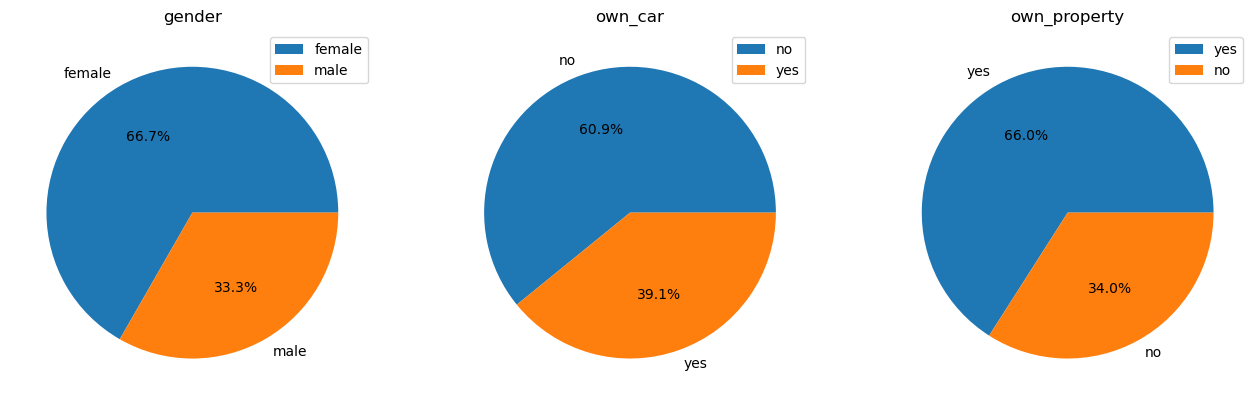

In [33]:
columns = ['gender', 'own_car', 'own_property']
plt.figure(figsize=(16 , 9))
for i in range(len(columns)):
    plt.subplot(1, 3, i+1)
    plt.title(columns[i])
    counts = df[columns[i]].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%'  )
    plt.legend(counts.index)
plt.show()

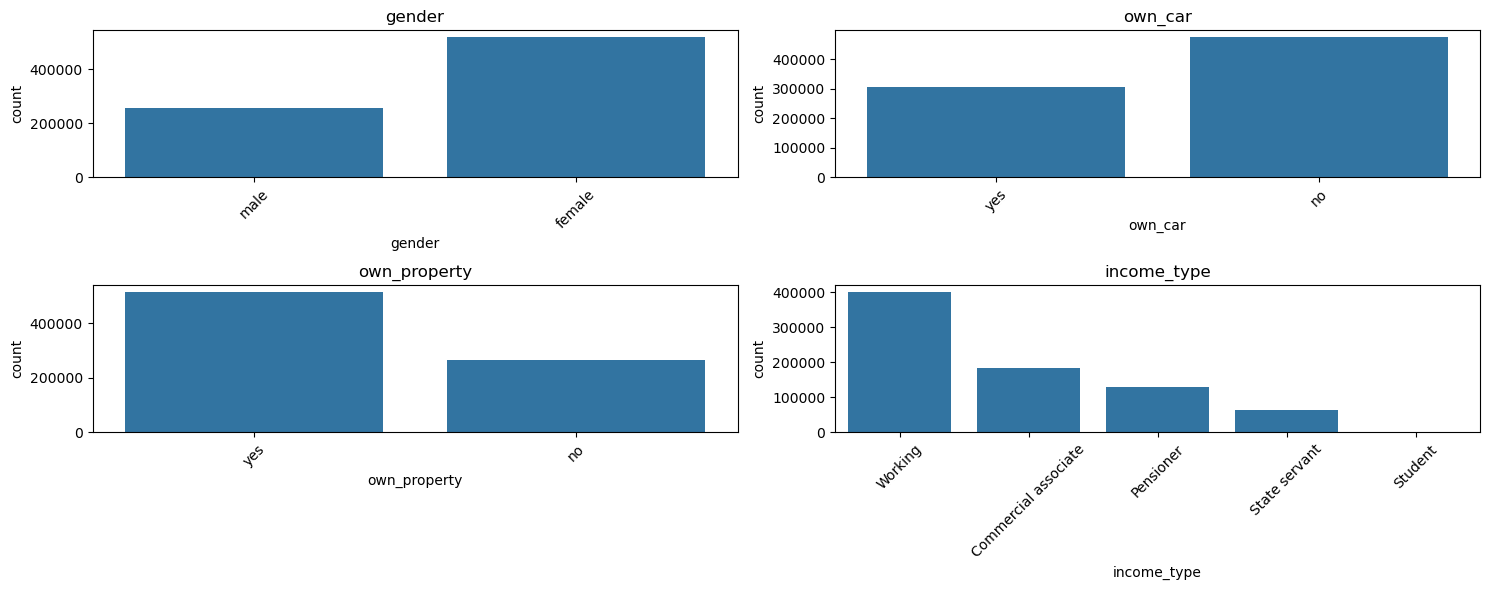

In [34]:
col = ['gender', 'own_car', 'own_property', 'income_type',]
plt.figure(figsize=(15, 6))
for i in range(len(col)):
    plt.subplot(2, 2, i+1)
    plt.title(col[i])
    sns.countplot(data=df, x=df[col[i]])
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [35]:
df['loan_status'].value_counts()

loan_status
good                 329536
first_month_due      290654
no_loan              145950
2nd_month_due          8747
bad_debt               1527
3rd_month_overdue       801
4th_month_overdue       286
5th_month_overdue       214
Name: count, dtype: int64

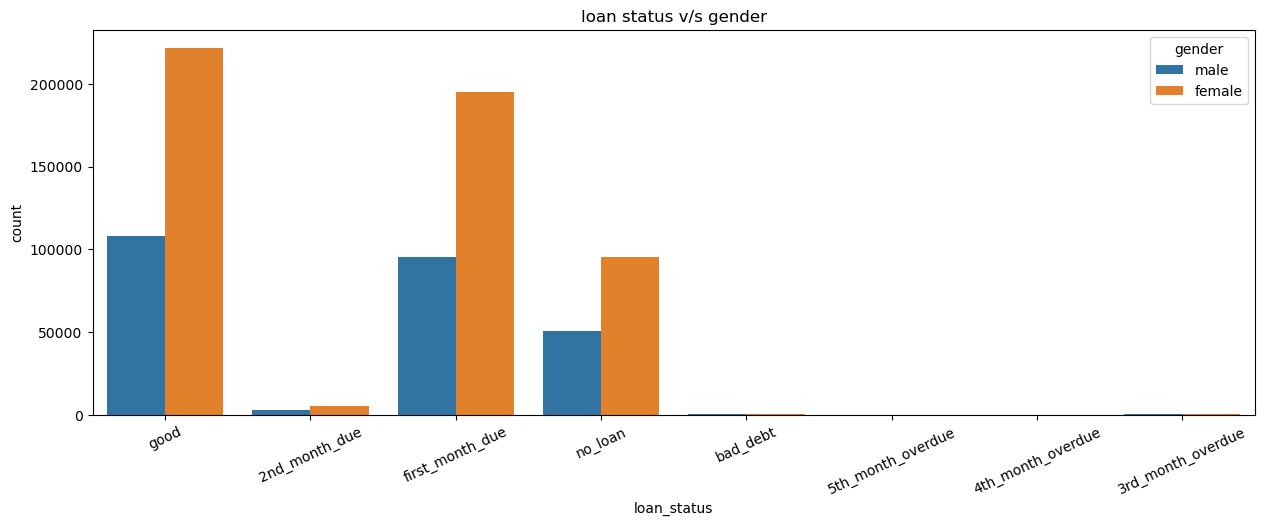

In [36]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x=df['loan_status'], hue=df['gender'])
plt.title('loan status v/s gender')
plt.xticks(rotation=25)
plt.show()

In [37]:
filtered_loan = df.groupby('loan_status')['gender'].value_counts()
filtered_loan[filtered_loan<10000].unstack()

gender,female,male
loan_status,,
2nd_month_due,5530,3217
3rd_month_overdue,510,291
4th_month_overdue,178,108
5th_month_overdue,128,86
bad_debt,809,718


<Figure size 1500x900 with 0 Axes>

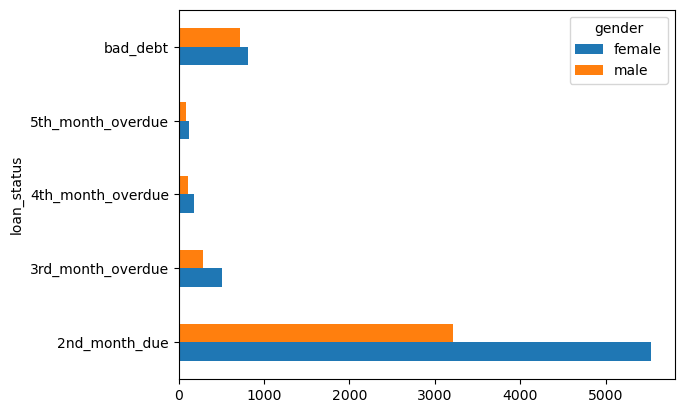

In [38]:
filtered_loan = df.groupby('loan_status')['gender'].value_counts()
plt.figure(figsize=(15, 9))
filtered_loan[filtered_loan<10000].unstack().plot(kind='barh')
plt.show()

In [39]:
df.columns

Index(['ID', 'gender', 'own_car', 'own_property', 'children', 'income',
       'income_type', 'education', 'family_status', 'housing_type',
       'age_in_days', 'employment_in_days', 'mobile', 'work_phone', 'phone',
       'email', 'family_members', 'months_balance', 'status', 'loan_status'],
      dtype='object')

In [40]:
df['income_type'].value_counts()

income_type
Working                 400164
Commercial associate    183385
Pensioner               128392
State servant            65437
Student                    337
Name: count, dtype: int64

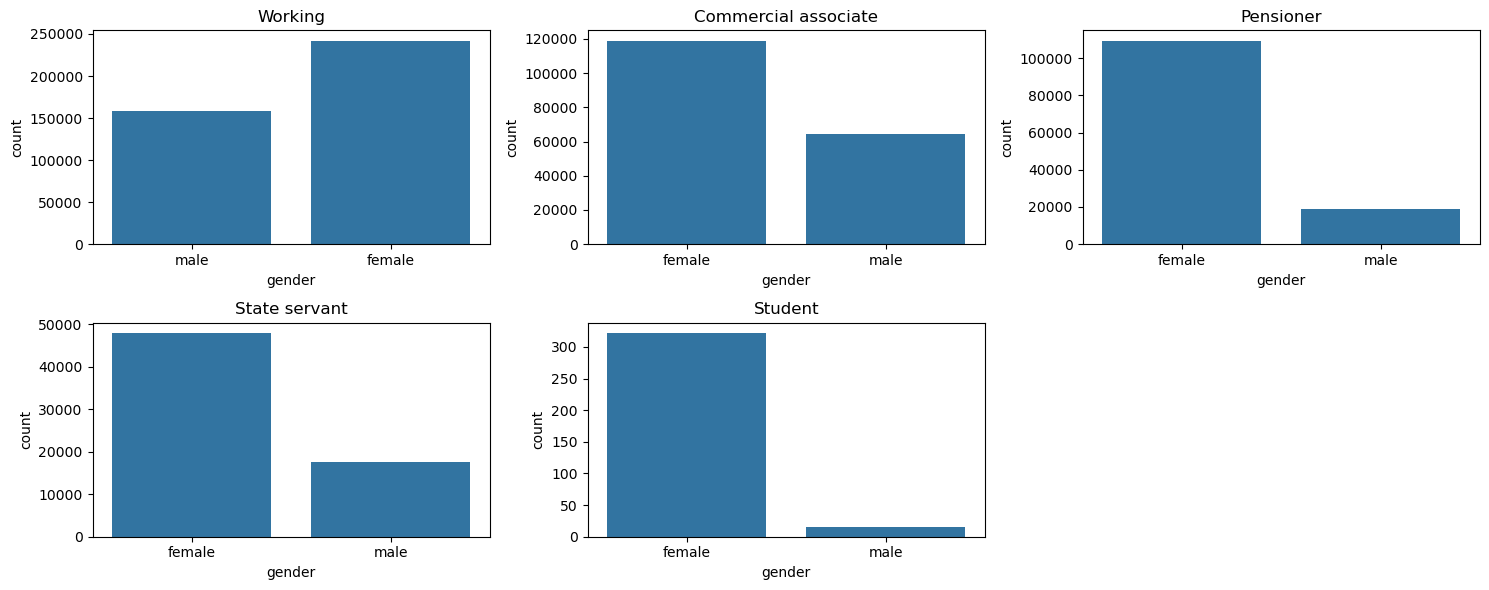

In [41]:
count = df['income_type'].value_counts()

plt.figure(figsize=(15, 6))
for i in range(len(count)):
    plt.subplot(2, 3, i+1)
    plt.title(count.index[i]) 
    sns.countplot(data=df[df['income_type'] == count.index[i]], x='gender')

plt.tight_layout() 
plt.show()

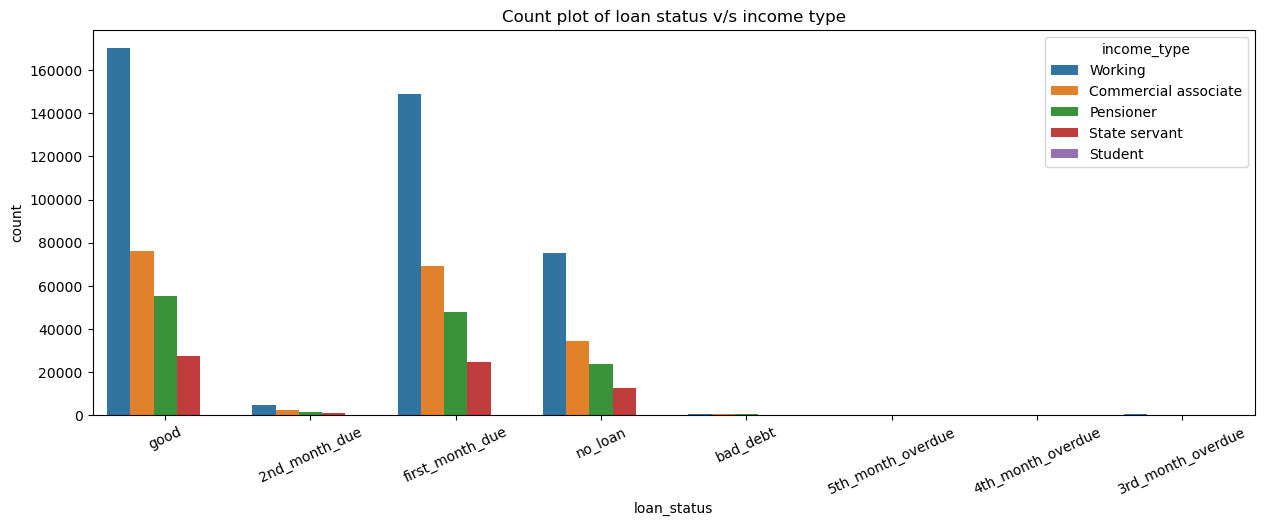

In [42]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x=df['loan_status'], hue=df['income_type'])
plt.title('Count plot of loan status v/s income type')
plt.xticks(rotation=25)
plt.show()

In [43]:
count = df.groupby('gender')[['income_type' , 'loan_status']].value_counts()

count[count<1000].unstack()

loan_status                  2nd_month_due  3rd_month_overdue  \
gender income_type                                              
female Commercial associate            NaN              117.0   
       Pensioner                     950.0              143.0   
       State servant                 592.0               26.0   
       Student                         NaN                NaN   
       Working                         NaN              224.0   
male   Commercial associate          883.0               70.0   
       Pensioner                     207.0               30.0   
       State servant                 175.0               13.0   
       Student                         1.0                NaN   
       Working                         NaN              178.0   

loan_status                  4th_month_overdue  5th_month_overdue  bad_debt  \
gender income_type                                                            
female Commercial associate               47.0               45.0     284.0   
       Pensioner                          66.0               35.0     252.0   
       State servant                      12.0                6.0      47.0   
       Student                             NaN                NaN       NaN   
       Working                            53.0               42.0     226.0   
male   Commercial associate               30.0               27.0     277.0   
       Pensioner                          14.0                9.0      61.0   
       State servant                       5.0                2.0      14.0   
       Student                             NaN                NaN       NaN   
       Working                            59.0               48.0     366.0   

loan_status                  first_month_due   good  no_loan  
gender income_type                                            
female Commercial associate              NaN    NaN      NaN  
       Pensioner                         NaN    NaN      NaN  
       State servant                     NaN    NaN      NaN  
       Student                          57.0  196.0     69.0  
       Working                           NaN    NaN      NaN  
male   Commercial associate              NaN    NaN      NaN  
       Pensioner                         NaN    NaN      NaN  
       State servant                     NaN    NaN      NaN  
       Student                          10.0    4.0      NaN  
       Working                           NaN    NaN      NaN

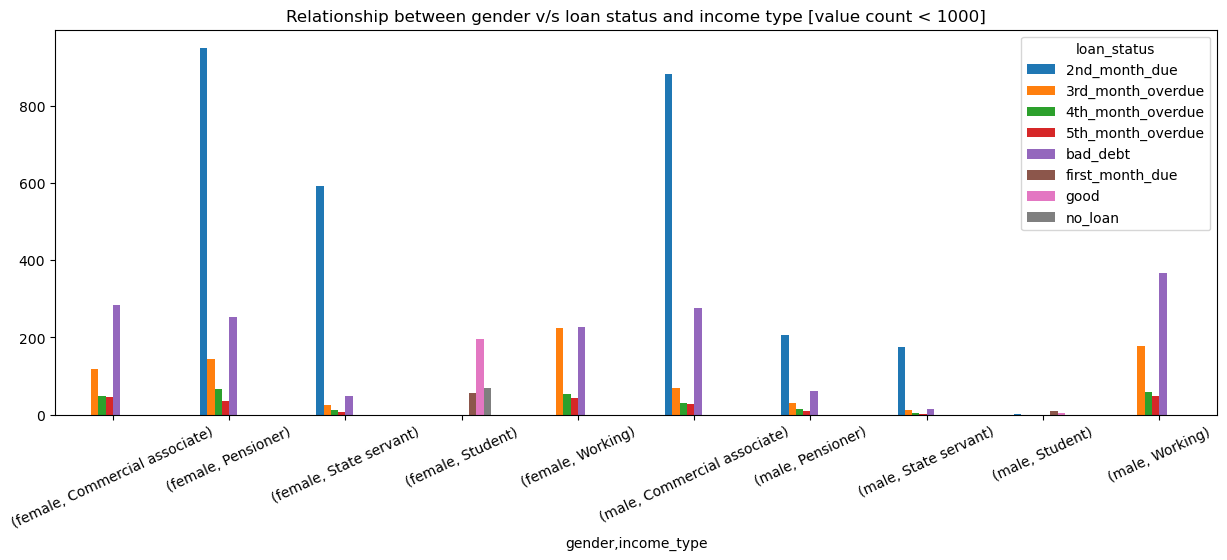

In [44]:
count = df.groupby('gender')[['income_type', 'loan_status' ]].value_counts()
count[count<1000].unstack().plot(kind='bar' , figsize=(15, 5) , legend=True ) 
plt.title('Relationship between gender v/s loan status and income type [value count < 1000]')
plt.xticks(rotation=25)
plt.show()

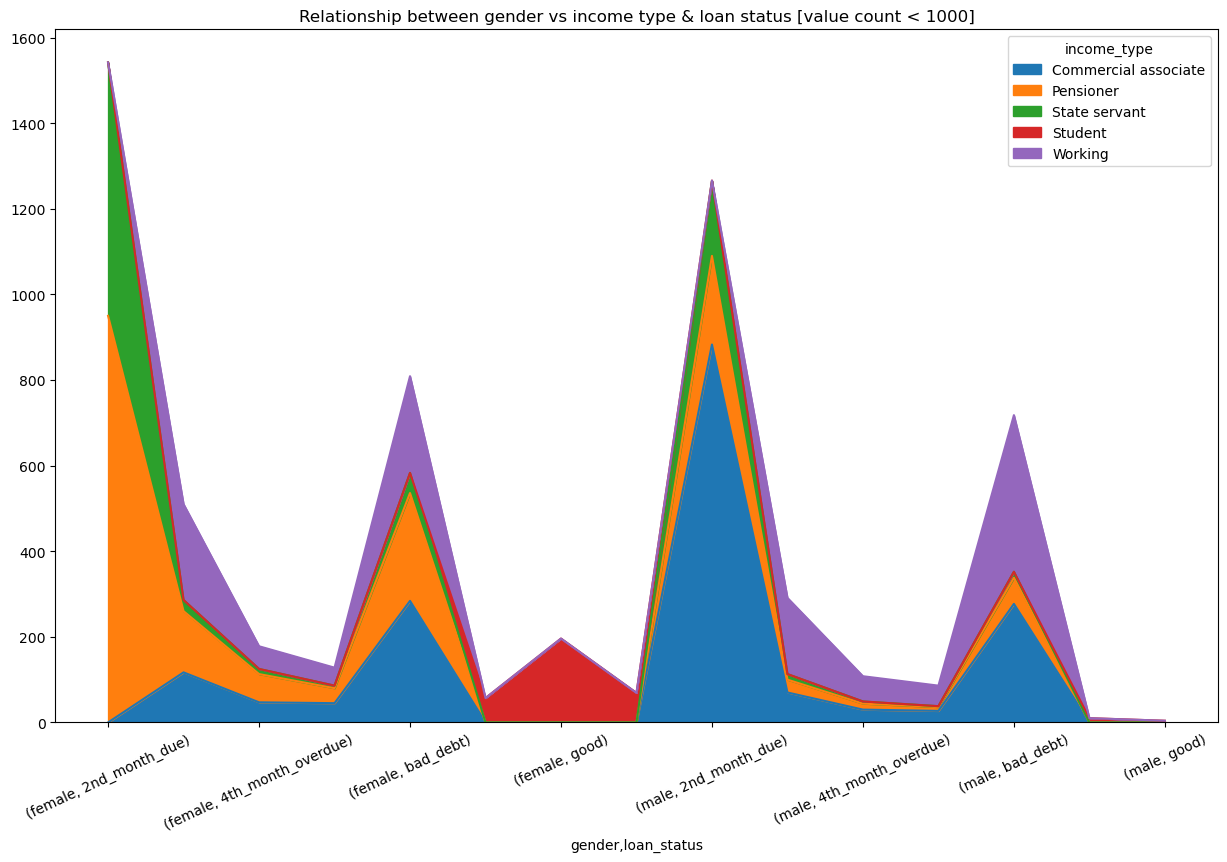

In [45]:
count = df.groupby('gender')[['loan_status','income_type']].value_counts()
count[count<1000].unstack().plot(kind='area' , figsize=(15, 9)) 
plt.title('Relationship between gender vs income type & loan status [value count < 1000]')
plt.xticks(rotation=25)
plt.show()

In [46]:
df.education.value_counts()

education
Secondary / secondary special    524261
Higher education                 213633
Incomplete higher                 30329
Lower secondary                    8655
Academic degree                     837
Name: count, dtype: int64

In [47]:
df.groupby('gender')[['education']].value_counts()

gender  education                    
female  Secondary / secondary special    349975
        Higher education                 144457
        Incomplete higher                 18638
        Lower secondary                    5177
        Academic degree                     604
male    Secondary / secondary special    174286
        Higher education                  69176
        Incomplete higher                 11691
        Lower secondary                    3478
        Academic degree                     233
Name: count, dtype: int64

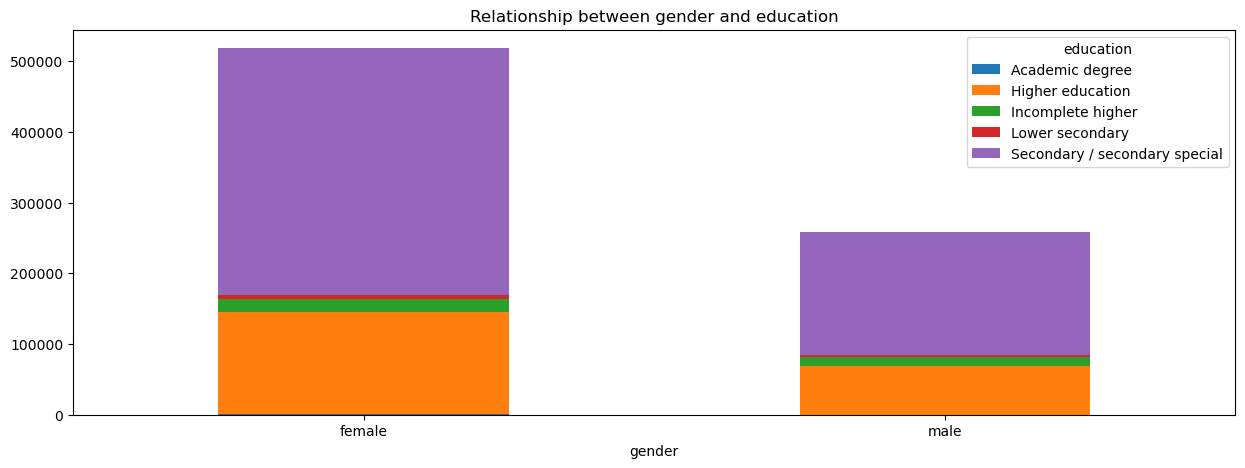

In [48]:
df.groupby('gender')[['education']].value_counts().unstack().plot(kind='bar', figsize=(15, 5) , stacked=True)
plt.xticks(rotation=360)
plt.title('Relationship between gender and education')
plt.show()

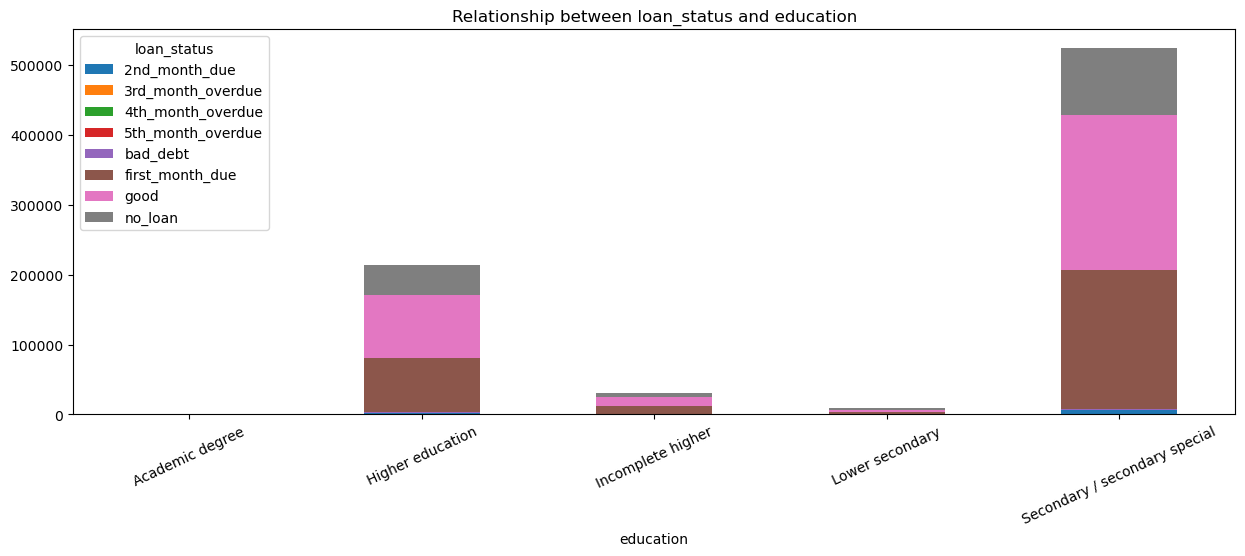

In [49]:
df.groupby('education')[['loan_status']].value_counts().unstack().plot(kind='bar', figsize=(15, 5) , stacked= True)
plt.title('Relationship between loan_status and education')
plt.xticks(rotation=25)
plt.show()

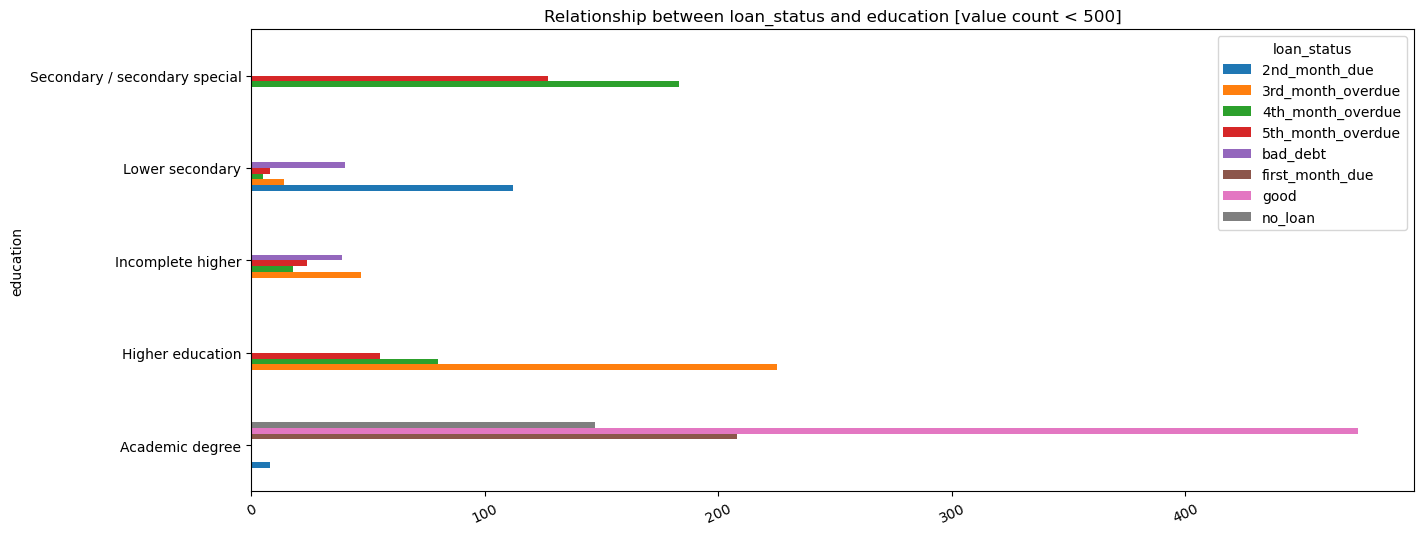

In [50]:
count = df.groupby('education')[['loan_status']].value_counts()
count[count<=500].unstack().plot(kind='barh' , figsize=(15, 6))
plt.title('Relationship between loan_status and education [value count < 500]')
plt.xticks(rotation=25)
plt.show()

In [51]:
df['housing_type'].unique()

array(['Rented apartment', 'House / apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [52]:
df['housing_type'].value_counts()

housing_type
House / apartment      697151
With parents            35735
Municipal apartment     24640
Rented apartment        10898
Office apartment         5636
Co-op apartment          3655
Name: count, dtype: int64

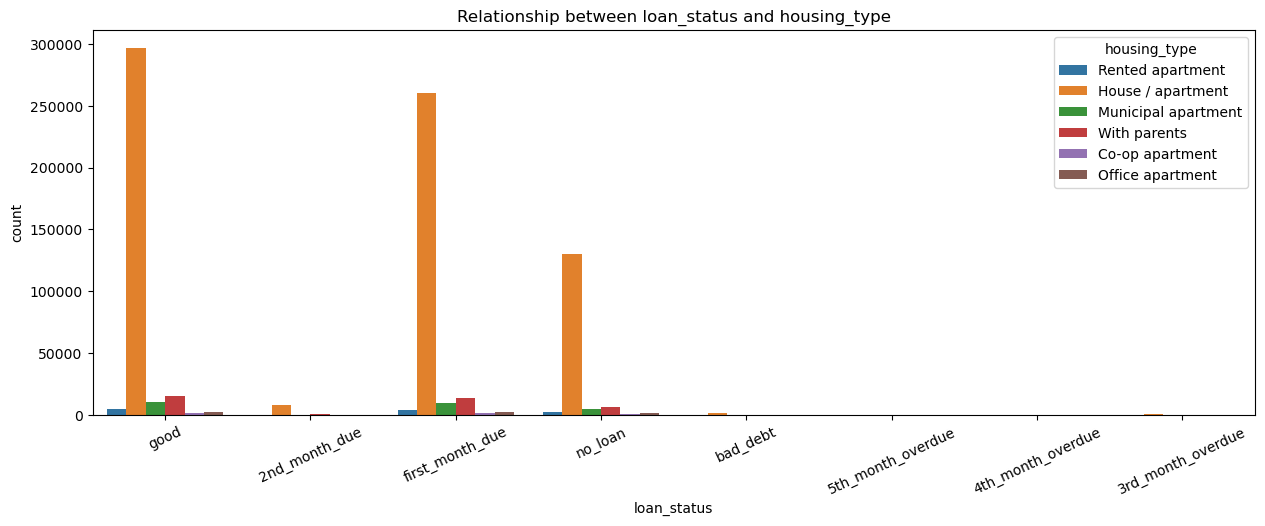

In [53]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x=df['loan_status'], hue=df['housing_type'])
plt.xticks(rotation=25)
plt.title('Relationship between loan_status and housing_type')
plt.show()

In [54]:
count = df.groupby(['housing_type', 'loan_status']).size()
bad_loan= count[count.index.get_level_values('loan_status') == 'bad_debt']
bad_loan

housing_type         loan_status
Co-op apartment      bad_debt         16
House / apartment    bad_debt       1368
Municipal apartment  bad_debt         54
Office apartment     bad_debt         14
Rented apartment     bad_debt         29
With parents         bad_debt         46
dtype: int64

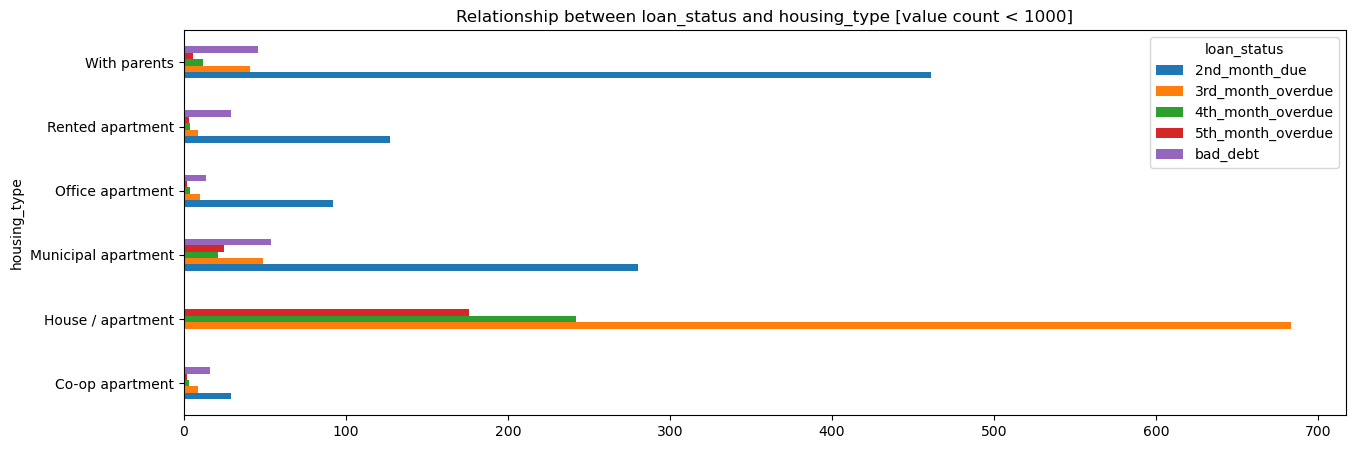

In [55]:
count = df.groupby(['housing_type', 'loan_status']).size()
count[count<1000].unstack().plot(kind='barh' , figsize=(15, 5) , legend=True)
plt.title('Relationship between loan_status and housing_type [value count < 1000]')
plt.show()

In [56]:
df.columns

Index(['ID', 'gender', 'own_car', 'own_property', 'children', 'income',
       'income_type', 'education', 'family_status', 'housing_type',
       'age_in_days', 'employment_in_days', 'mobile', 'work_phone', 'phone',
       'email', 'family_members', 'months_balance', 'status', 'loan_status'],
      dtype='object')

In [57]:
df.family_members.value_counts()

family_members
2.0     423723
1.0     141477
3.0     134894
4.0      66990
5.0       8999
6.0       1196
7.0        273
15.0       111
9.0         46
20.0         6
Name: count, dtype: int64

In [58]:
df.groupby('family_members')[['loan_status']].value_counts().unstack()

loan_status,2nd_month_due,3rd_month_overdue,4th_month_overdue,5th_month_overdue,bad_debt,first_month_due,good,no_loan
family_members,,,,,,,,
1.0,1651.0,179.0,71.0,52.0,239.0,53411.0,59894.0,25980.0
2.0,4571.0,414.0,161.0,108.0,808.0,157392.0,181131.0,79138.0
3.0,1528.0,132.0,34.0,34.0,381.0,50885.0,54889.0,27011.0
4.0,858.0,54.0,15.0,18.0,92.0,25110.0,29037.0,11806.0
5.0,108.0,21.0,4.0,1.0,5.0,3234.0,4068.0,1558.0
6.0,16.0,1.0,1.0,1.0,2.0,463.0,442.0,270.0
7.0,NaN,NaN,NaN,NaN,NaN,57.0,53.0,163.0
9.0,10.0,NaN,NaN,NaN,NaN,14.0,22.0,NaN
15.0,5.0,NaN,NaN,NaN,NaN,82.0,NaN,24.0


In [59]:
df.select_dtypes(exclude='object').columns

Index(['ID', 'children', 'income', 'age_in_days', 'employment_in_days',
       'mobile', 'work_phone', 'phone', 'email', 'family_members',
       'months_balance'],
      dtype='object')

In [60]:
df.children.value_counts()

children
0     540639
1     155638
2      70399
3       9328
4       1224
5        324
14       111
7         46
19         6
Name: count, dtype: int64

In [61]:
df.groupby('children')[['loan_status']].value_counts().unstack()

loan_status,2nd_month_due,3rd_month_overdue,4th_month_overdue,5th_month_overdue,bad_debt,first_month_due,good,no_loan
children,,,,,,,,
0,5908.0,559.0,213.0,146.0,994.0,201794.0,230268.0,100757.0
1,1801.0,156.0,51.0,46.0,434.0,58550.0,64120.0,30480.0
2,888.0,64.0,17.0,20.0,92.0,26171.0,30485.0,12662.0
3,119.0,21.0,4.0,1.0,5.0,3468.0,4143.0,1567.0
4,16.0,1.0,1.0,1.0,2.0,490.0,416.0,297.0
5,NaN,NaN,NaN,NaN,NaN,79.0,82.0,163.0
7,10.0,NaN,NaN,NaN,NaN,14.0,22.0,NaN
14,5.0,NaN,NaN,NaN,NaN,82.0,NaN,24.0
19,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN


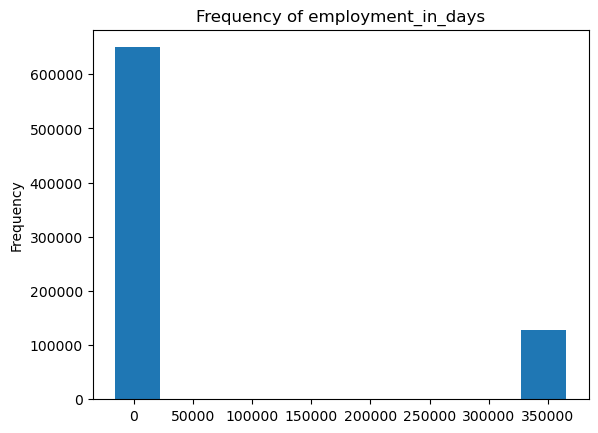

In [62]:
df['employment_in_days'].plot(kind = 'hist')
plt.title('Frequency of employment_in_days')
plt.show()

In [63]:
df[df['employment_in_days'] > 0].value_counts().sum()

127972

In [64]:
filtered_df = df[df['employment_in_days'] > 0]
filtered_df.groupby('loan_status').size()

loan_status
2nd_month_due         1128
3rd_month_overdue      149
4th_month_overdue       73
5th_month_overdue       37
bad_debt               266
first_month_due      47620
good                 55172
no_loan              23527
dtype: int64

In [65]:
df.columns

Index(['ID', 'gender', 'own_car', 'own_property', 'children', 'income',
       'income_type', 'education', 'family_status', 'housing_type',
       'age_in_days', 'employment_in_days', 'mobile', 'work_phone', 'phone',
       'email', 'family_members', 'months_balance', 'status', 'loan_status'],
      dtype='object')

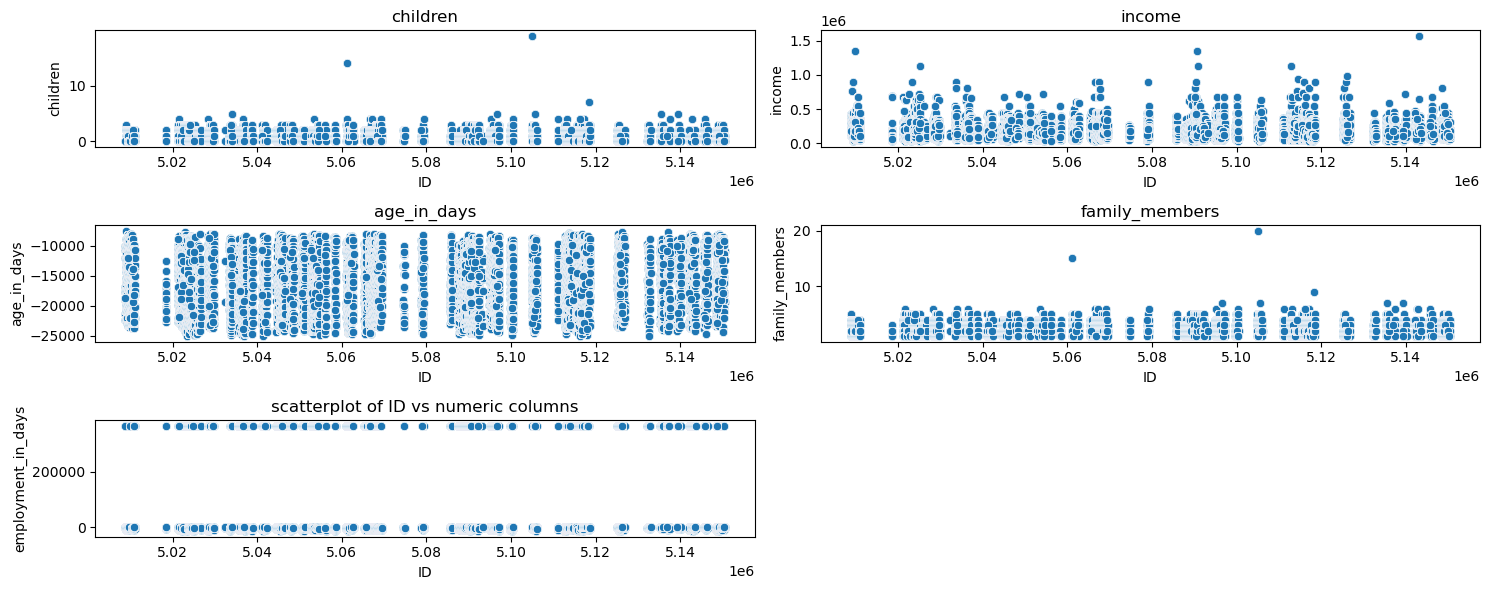

In [66]:
col = ['children', 'income', 'age_in_days',  'family_members' , 'employment_in_days']
plt.figure(figsize=(15, 6))

for i in range(len(col)):
    plt.subplot(3, 2, i+1)
    plt.title(col[i])  
    sns.scatterplot(data=df, y=col[i], x='ID')
plt.title('scatterplot of ID vs numeric columns')
plt.tight_layout() 
plt.show()

In [67]:
df.columns

Index(['ID', 'gender', 'own_car', 'own_property', 'children', 'income',
       'income_type', 'education', 'family_status', 'housing_type',
       'age_in_days', 'employment_in_days', 'mobile', 'work_phone', 'phone',
       'email', 'family_members', 'months_balance', 'status', 'loan_status'],
      dtype='object')

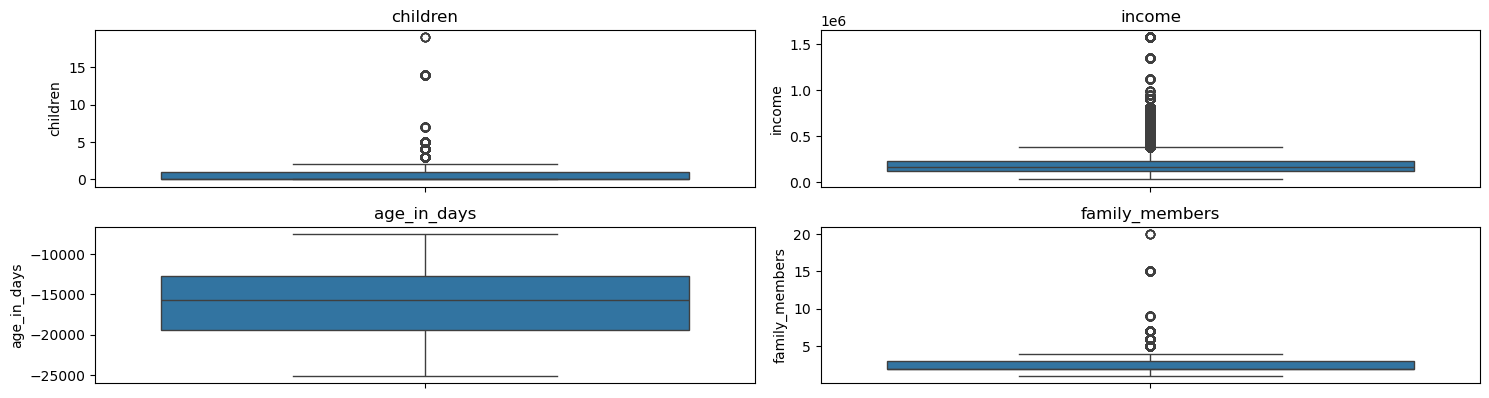

In [68]:
col = ['children', 'income', 'age_in_days',  'family_members' ]
plt.figure(figsize=(15, 6))
for i in range(len(col)):
    plt.subplot(3, 2, i+1)
    plt.title(col[i]) 
    sns.boxplot(data=df, y=col[i])

plt.tight_layout()  
plt.show()

In [69]:
col = ['children', 'income' , 'family_members']

for i in range(len(col)):
    q1 = df[col[i]].quantile(0.25)
    q3 = df[col[i]].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[col[i]] = np.where((df[col[i]] >= upper_bound) | (df[col[i]] <= lower_bound), df[col[i]].median() , df[col[i]])

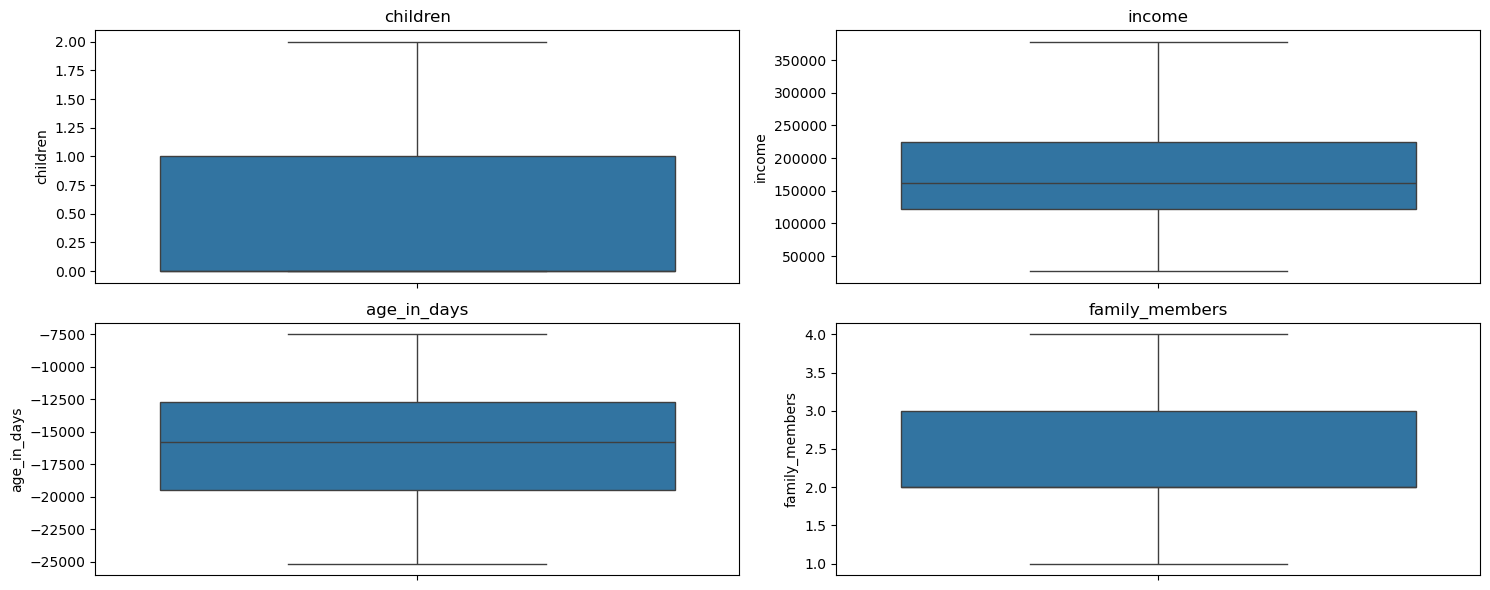

In [70]:
col = ['children', 'income', 'age_in_days',  'family_members']

plt.figure(figsize=(15, 6))

for i in range(len(col)):
    plt.subplot(2, 2, i+1)
    plt.title(col[i])  
    sns.boxplot(data=df, y=col[i])

plt.tight_layout()  
plt.show()

In [71]:
df.select_dtypes(exclude='object').columns

Index(['ID', 'children', 'income', 'age_in_days', 'employment_in_days',
       'mobile', 'work_phone', 'phone', 'email', 'family_members',
       'months_balance'],
      dtype='object')

In [72]:
col = ['children', 'income', 'age_in_days',  'family_members']
sc = StandardScaler()
for i in col:
    df[i] = sc.fit_transform(df[[i]])

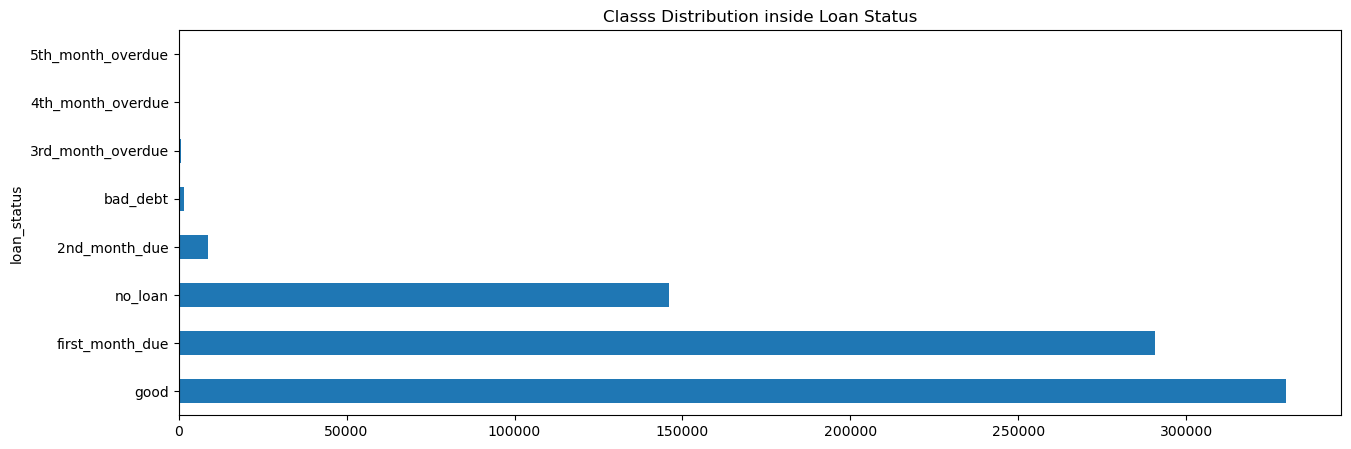

In [73]:
df.loan_status.value_counts().plot(kind='barh', figsize=(15, 5))
plt.title('Classs Distribution inside Loan Status')
plt.show()

In [74]:
df.head()

,ID,gender,own_car,own_property,children,income,income_type,education,family_status,housing_type,age_in_days,employment_in_days,mobile,work_phone,phone,email,family_members,months_balance,status,loan_status
0,5008804,male,yes,yes,-0.590317,-0.168401,Working,Higher education,Civil marriage,Rented apartment,1.00381,-4542,1,1,0,0,-0.199667,0,C,good
1,5008804,male,yes,yes,-0.590317,-0.168401,Working,Higher education,Civil marriage,Rented apartment,1.00381,-4542,1,1,0,0,-0.199667,-1,C,good
2,5008804,male,yes,yes,-0.590317,-0.168401,Working,Higher education,Civil marriage,Rented apartment,1.00381,-4542,1,1,0,0,-0.199667,-2,C,good
3,5008804,male,yes,yes,-0.590317,-0.168401,Working,Higher education,Civil marriage,Rented apartment,1.00381,-4542,1,1,0,0,-0.199667,-3,C,good
4,5008804,male,yes,yes,-0.590317,-0.168401,Working,Higher education,Civil marriage,Rented apartment,1.00381,-4542,1,1,0,0,-0.199667,-4,C,good


In [75]:
df.columns

Index(['ID', 'gender', 'own_car', 'own_property', 'children', 'income',
       'income_type', 'education', 'family_status', 'housing_type',
       'age_in_days', 'employment_in_days', 'mobile', 'work_phone', 'phone',
       'email', 'family_members', 'months_balance', 'status', 'loan_status'],
      dtype='object')

In [76]:
col = ['gender', 'own_car', 'own_property', 'income_type','education', 'family_status', 'housing_type', 'status']
le = LabelEncoder()
for i in col:
    df[i] =le.fit_transform(df[i] )

In [77]:
df.head()

,ID,gender,own_car,own_property,children,income,income_type,education,family_status,housing_type,age_in_days,employment_in_days,mobile,work_phone,phone,email,family_members,months_balance,status,loan_status
0,5008804,1,1,1,-0.590317,-0.168401,4,1,0,4,1.00381,-4542,1,1,0,0,-0.199667,0,6,good
1,5008804,1,1,1,-0.590317,-0.168401,4,1,0,4,1.00381,-4542,1,1,0,0,-0.199667,-1,6,good
2,5008804,1,1,1,-0.590317,-0.168401,4,1,0,4,1.00381,-4542,1,1,0,0,-0.199667,-2,6,good
3,5008804,1,1,1,-0.590317,-0.168401,4,1,0,4,1.00381,-4542,1,1,0,0,-0.199667,-3,6,good
4,5008804,1,1,1,-0.590317,-0.168401,4,1,0,4,1.00381,-4542,1,1,0,0,-0.199667,-4,6,good


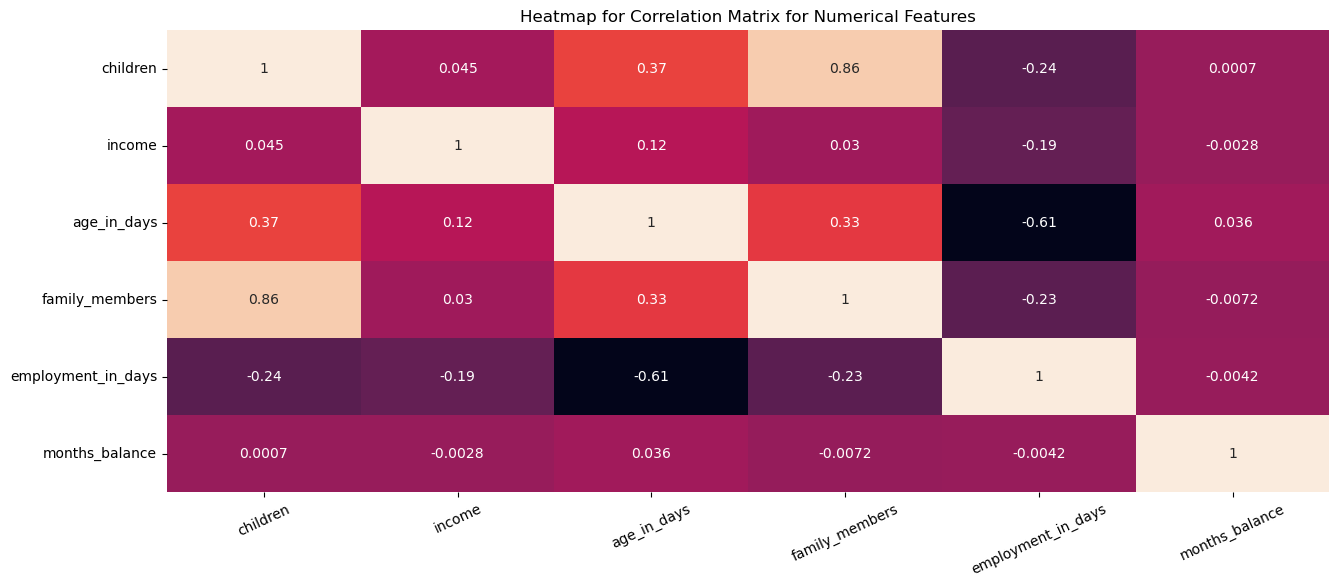

In [78]:
plt.figure(figsize=(15, 6))
sns.heatmap(df[['children', 'income', 'age_in_days',  'family_members', 'employment_in_days', 'months_balance']].corr(), annot=True , cbar=False) 
plt.xticks(rotation=25)
plt.title('Heatmap for Correlation Matrix for Numerical Features')
plt.show()

In [79]:
col = df.drop(['loan_status', 'status'], axis=1) 
factor  = pd.DataFrame(columns=["VIF", "Features"] )
factor["Features"] = col.columns
factor["VIF"] = [variance_inflation_factor(col.values, i) for i in range(col.shape[1])]
factor

,VIF,Features
0,1.019165,ID
1,1.240486,gender
2,1.218307,own_car
3,1.096036,own_property
4,12.236508,children
5,1.165436,income
6,1.187861,income_type
7,1.090580,education
8,4.476697,family_status
9,1.072517,housing_type


In [80]:
X = df.drop(['loan_status' , 'status', 'children' , 'family_members', 'mobile'], axis = 1) 
y = df['loan_status']

In [81]:
X.columns

Index(['ID', 'gender', 'own_car', 'own_property', 'income', 'income_type',
       'education', 'family_status', 'housing_type', 'age_in_days',
       'employment_in_days', 'work_phone', 'phone', 'email', 'months_balance'],
      dtype='object')

In [82]:
X.head()

,ID,gender,own_car,own_property,income,income_type,education,family_status,housing_type,age_in_days,employment_in_days,work_phone,phone,email,months_balance
0,5008804,1,1,1,-0.168401,4,1,0,4,1.00381,-4542,1,0,0,0
1,5008804,1,1,1,-0.168401,4,1,0,4,1.00381,-4542,1,0,0,-1
2,5008804,1,1,1,-0.168401,4,1,0,4,1.00381,-4542,1,0,0,-2
3,5008804,1,1,1,-0.168401,4,1,0,4,1.00381,-4542,1,0,0,-3
4,5008804,1,1,1,-0.168401,4,1,0,4,1.00381,-4542,1,0,0,-4


In [83]:
print(f'The shape of X ={X.shape} \n')
print(f'The shape of y ={y.shape}')

The shape of X =(777715, 15) 

The shape of y =(777715,)


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [85]:
model = RandomForestClassifier()

In [86]:
model.fit(X_train, y_train )

RandomForestClassifier()

In [87]:
y_pred = model.predict(X_test)

In [88]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).head(10)

,Actual,Predicted
489996,first_month_due,first_month_due
293437,first_month_due,first_month_due
544675,first_month_due,first_month_due
688170,good,good
582519,no_loan,first_month_due
248623,good,good
476807,first_month_due,first_month_due
693691,good,good
89611,good,good
756662,good,good


In [89]:
(f'Accuracy Score : {accuracy_score(y_test, y_pred)*100:.2f} %')

'Accuracy Score : 88.25 %'

In [90]:
print(f"Precision Score : {precision_score(y_test, y_pred , average = 'micro'):.2f}")

Precision Score : 0.88


In [91]:
print(f"F1-Score : {f1_score(y_test, y_pred , average='micro')}")

F1-Score : 0.8825148029805263


In [92]:
print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

    2nd_month_due       0.34      0.27      0.30      1743
3rd_month_overdue       0.17      0.15      0.16       150
4th_month_overdue       0.05      0.04      0.04        52
5th_month_overdue       0.03      0.03      0.03        33
         bad_debt       0.92      0.86      0.89       307
  first_month_due       0.85      0.88      0.86     58003
             good       0.95      0.95      0.95     66226
          no_loan       0.83      0.78      0.81     29029

         accuracy                           0.88    155543
        macro avg       0.52      0.49      0.50    155543
     weighted avg       0.88      0.88      0.88    155543

